<a href="https://colab.research.google.com/github/parrisatwork/Data-Predictions/blob/main/Prediction_of_Product_Sales_Parris_Trimingham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

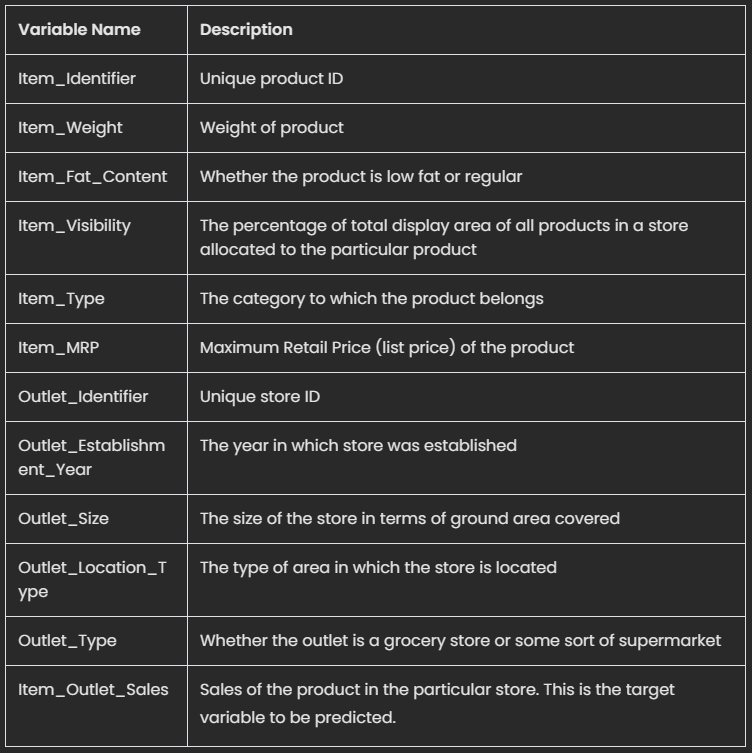

## **Imports**

In [1]:
#Import libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
sns.set_style('white')
import pandas as pd
import numpy as np
## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [2]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

In [3]:
# Gathering parameters:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


## **Clean Data**


In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- #### All other data types are as they should be.

## Duplicated Data

In [7]:
# Let's search for duplicated data:
df.duplicated().sum()

0

There are no duplicated data to drop.

## Missing Data

In [8]:
# Let's search for missing data:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- #### Identifying of missing data yields Weight (1463) and Size (2410) have missing data. Let's identifiy the percentage that is missing.

In [9]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- #### Both Weight (17%) and Size (28%) have missing data and it would be best to drop these rows.

- **Missing 17.17% and 28.28% of values**
- **Strategy:**
 - Replace missing values with the median value of the column
- **Justification**
  - This is less affected by outliers than strategy = 'mean'.
  - However, for the Outlet_size, we can use the most frequented value.

In [10]:
# Define the Item_Weight Mean.
median_Weight = df['Item_Weight'].median()

In [11]:
## Replace the missing values with the column's 'median' value.
df['Item_Weight'].fillna(value = median_Weight, inplace = True)

In [12]:
# Let's check out the Item_Weight column for missing data.
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
## And we will fill in the missing Outlet_Size data with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [14]:
# Now let's look for missing data.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- #### We can confirm that now, there is no missing data.

## Fixing Data Types

## Inspecting Categorical Columns & Addressing Inconsistent Values

- #### We will now address the data types and make sure that they match the data dictionary.

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [17]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [18]:
# Let's see what issues lie in the Item_Fat_Content label.
pd.set_option('display.max_rows', None)
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- #### Upon further investigating, "Item_Fat_Content" has inconsistant categories of data. Let's clean that up.

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

- #### And let's confirm it was changed.

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

- #### After further investigation of the categorical columns, there are zero inconsistencies with spelling or grammar of any categories.

### 'Item Identifier' Column

In [23]:
## Display the unique values from the column
print(df['Item_Identifier'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


In [24]:
# Display Item Identifier value counts to look for any inconsistencies
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31     8
NCL53     8
NCB3

### 'Item Type' Column

In [25]:
## Display the unique values from the column
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [26]:
# Display Item Type value counts to look for any inconsistencies
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### 'Outlet Identifier' Column

In [27]:
## Display the unique values from the column
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


### 'Outlet Size' Column

In [28]:
## Display the unique values from the column
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


### 'Outlet Location Type' Column

In [29]:
## Display the unique values from the column
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


###'Outlet Type' Column

In [30]:
## Display the unique values from the column
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


## Summary Statistics for Numeric Features

In [31]:
## Display the descriptive statistics for the numeric columns
df.describe(include= 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


### 'Item Weight' Column

In [32]:
#Display Item Weight summary statistics
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

'Item Visibility' Column

In [33]:
#Display Item Visibility summary statistics
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

### 'Item MRP' Column

In [34]:
#Display Item MRP summary statistics
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

### 'Item Outlet Sales' Column

In [35]:
# Display Item Outlet Sales summary statistics
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## **Exploratory Data Analysis**


### Exploratory Visuals & Analysis

- #### To help illustrate the Production Sale data, we will produce visual aides in the form of charts.

 - Histogram to view the distributions of various features in your dataset.
 - Boxplot to view statistical summaries of various features in your dataset.
 - Heatmap of the correlation between features.

In [36]:
# Checking info again before we proceed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 - For each numeric feature, we will plot the distribution and a boxplot.

In [37]:
# Let's find out what those numeric featurs are:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### 'Item Weight' Column

In [38]:
#Display the descriptive statistics for the column
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

 - Look at that! Going over "Item Weight", we can see that both the Mean (12.81342) and the Median (12.60000) weights are about equal.

## **Exploratory Data Analysis**


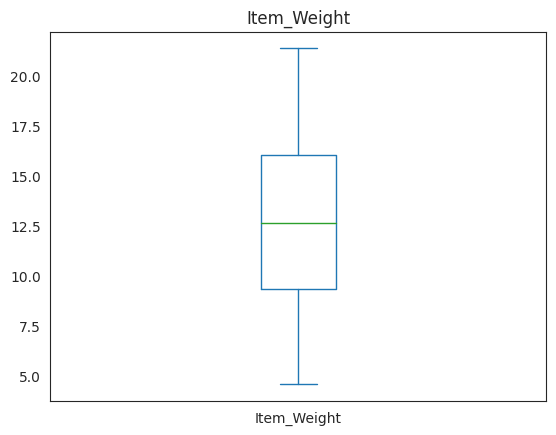

In [39]:
## Using kind='box'
ax = df['Item_Weight'].plot(kind='box')

## Set the Title
ax.set_title('Item_Weight');

<Axes: >

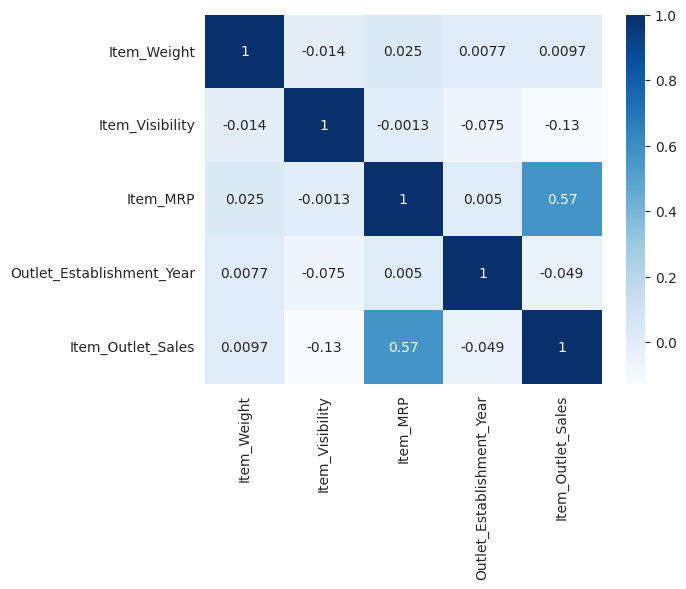

In [40]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

### 'Item Visibility' Boxplot

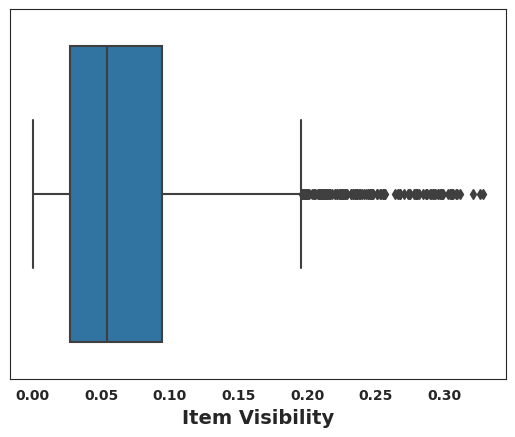

In [41]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'Item_Visibility')
ax.set_xlabel('Item Visibility', fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold');


#### Since our end goal is to increase sales, let's produce a few charts that will help us to see the properties of products, and trends, that play a crucial role for the company.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Explanatory Data Analysis**

#### **Q1: Does MRP correlate to Sales?**
- What two variables can we use to visualize this data?
 - Item MRP vs Item Outlet Sales

#### **Q2: Does Fat Content increase or decrease sales?**
- What two variables can we use to visualize this data?
 - Item_Fat_Content vs Item Outlet Sales

#### **Q3: What is the trend for earnings for the last 3 years?**
- What two variables can we use to visualize this data?



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### **Q1: Does MRP correlate to Sales?**

In [44]:
means = df.groupby('Item_Identifier')['Item_MRP'].mean().sort_values(ascending=False)
means

Item_Identifier
FDR25    265.468400
NCS29    265.455067
FDK51    265.416971
FDS13    265.302686
FDL58    263.956800
FDI15    263.938400
FDV49    263.855933
FDB15    263.813943
NCM05    263.622600
FDY14    263.547600
FDU12    263.445689
FDK40    263.219571
NCB31    263.091000
FDY02    263.019571
FDF05    262.891000
FDS56    262.608533
FDO09    262.391000
DRF37    262.374333
FDF39    262.316000
NCS06    262.191000
FDR59    262.071900
NCL06    261.892733
FDG47    261.808533
FDJ41    261.442733
FDP28    260.981100
FDN51    260.893600
FDS26    260.859400
DRM11    260.727800
FDT16    260.667800
FDU55    260.477800
NCQ29    260.227800
NCF06    259.296200
FDR09    259.181914
FDC02    259.144467
FDA04    259.008700
NCW30    258.746200
FDL57    258.730400
FDV33    258.380400
FDK46    258.295333
FDF04    258.117900
FDM21    257.744600
FDK28    257.664600
FDQ11    257.658800
FDD44    257.647933
FDY55    257.273800
FDB52    256.907200
NCG06    256.814600
FDG26    256.499667
FDT07    256.321889
FDA2

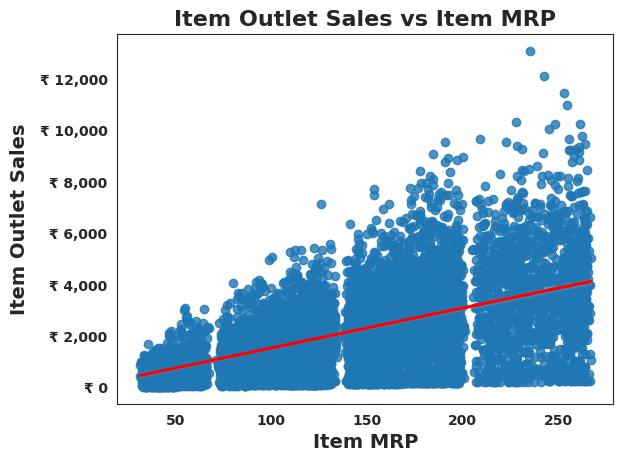

In [45]:
## Define a MatplotLib ax object using sns.regplot()
ax = sns.regplot(x ='Item_MRP', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
## Set the Title
ax.set_title('Item Outlet Sales vs Item MRP', fontsize=16, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item MRP', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.show()

#### **Q2: Does Fat Content increase or decrease sales?**

In [46]:
means2 = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means2

Item_Fat_Content
Regular    2224.561170
Low Fat    2157.711534
Name: Item_Outlet_Sales, dtype: float64

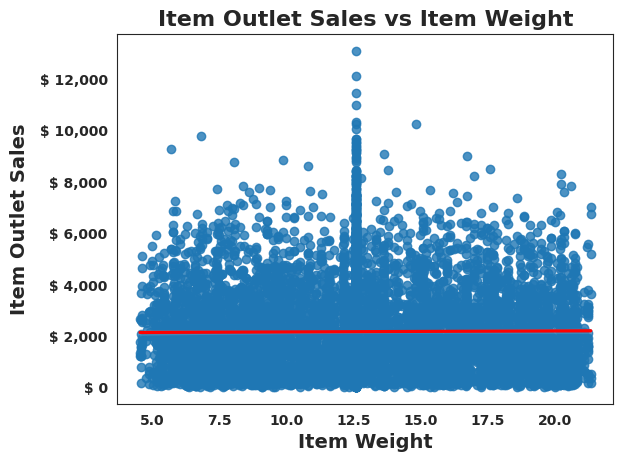

In [47]:
## Define a MatplotLib ax object using sns.regplot()

ax = sns.regplot(x ='Item_Weight', y = 'Item_Outlet_Sales', data = df, line_kws = {'color':'red'})

plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')

## Set the Title
ax.set_title('Item Outlet Sales vs Item Weight',  fontsize=16, weight='bold')
# Set Axes Labels
ax.set_xlabel('Item Weight', fontsize=14, weight='bold')
ax.set_ylabel('Item Outlet Sales', fontsize=14, weight='bold')
price_fmt = StrMethodFormatter(" $ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)
plt.show()

#### **Q3: Which Item type has the most sales?**

In [48]:
df['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

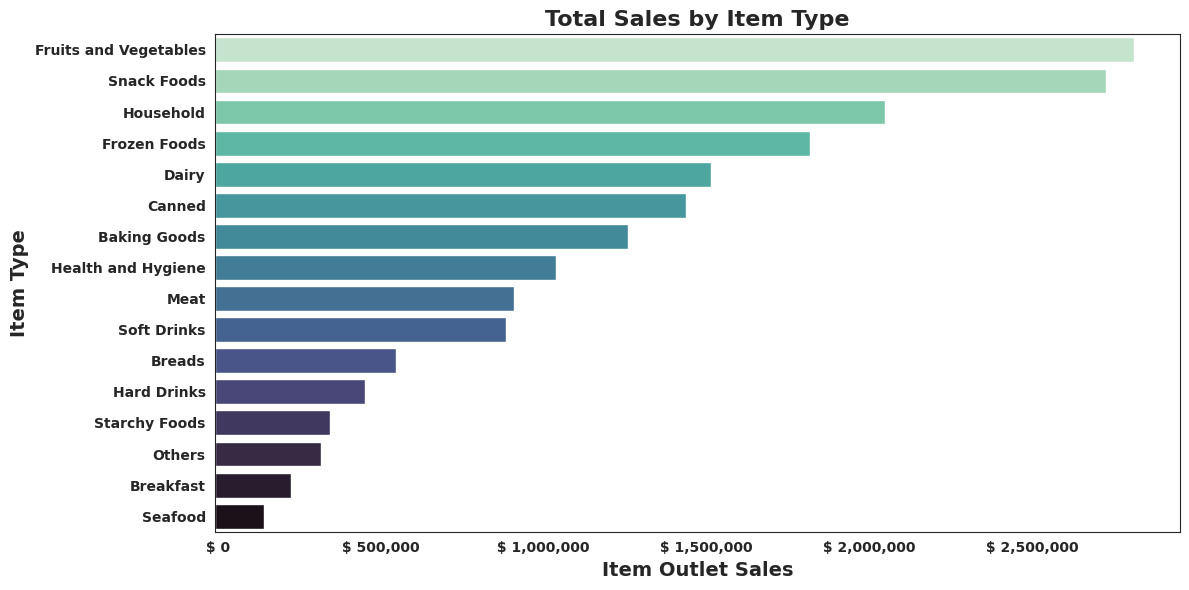

In [49]:
# Set Color palette
   
df_sorted = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values('Item_Outlet_Sales', ascending=False)
colors = sns.color_palette("mako_r", n_colors=len(df_sorted))
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_sorted,
                 x='Item_Outlet_Sales',
                 y='Item_Type', 
                 order=df_sorted['Item_Type'], 
                 palette=colors)
ax.set_ylabel('Item Type', fontsize=14, weight='bold')
ax.set_xlabel('Item Outlet Sales', fontsize=14, weight='bold')
ax.set_title('Total Sales by Item Type', fontsize=16, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
price_fmt = StrMethodFormatter(" $ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()

#### Preprocessing for Machine Learning

#### Imports

In [50]:
# Importing Data:
df2 = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

### Reloading the Data

In [51]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

Fixing Errors

In [52]:
# Replace LF to 0, low fat to 0, Low Fat to 0, Regular to 1, reg to 1 in Item Fat Content column
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [53]:
#Check value counts
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 - We have no column to drop.

In [54]:
# Checking for Duplicates
df2.duplicated().sum()

0

 - We have no duplicates.

In [55]:
# Checking missing values
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [56]:
# Redoing what was done far above.
i_mean = np.mean(df["Item_Weight"])
# replacing missing values with Item_Weight average
df2['Item_Weight'].fillna(value = i_mean, inplace = True)
# filling in missing data in the Outlet_Size solumn
df2['Outlet_Size'].fillna(value = "Unknown", inplace = True)
# double checking to see if the missing data has been filled in Outlet_Size
df2.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Defining X and y

In [58]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

#### Train-Test-Split

In [59]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                6392 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                6392 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 7503 to 1784
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            2131 non-null   object 
 1   Item_Weight                2131 non-null   float64
 2   Item_Fat_Content           2131 non-null   object 
 3   Item_Visibility            2131 non-null   float64
 4   Item_Type                  2131 non-null   object 
 5   Item_MRP                   2131 non-null   float64
 6   Outlet_Identifier          2131 non-null   object 
 7   Outlet_Establishment_Year  2131 non-null   int64  
 8   Outlet_Size                2131 non-null   object 
 9   Outlet_Location_Type       2131 non-null   object 
 10  Outlet_Type                2131 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 199.8+ KB


### Preparing Data

### Column Selectors

In [62]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### Transformers

In [63]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#### Making a Preprocessing Pipeline

In [64]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [66]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough', verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bacd30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bad150>)],
                  verbose_feature_names_out=False)

## Maching Learning - Training the Models

### Imports for Machine Learning

In [67]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [68]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bacd30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bad150>)],
                  verbose_feature_names_out=False)

### Data Fitting and Scaler

In [69]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bacd30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bad150>)],
                  verbose_feature_names_out=False)

In [70]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [71]:
# Check for missing values and that data is scaled and one-hot encoded
X_train_processed

array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [72]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1593)




array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

### Convert Preprocessed Array to Dataframes

In [73]:
# Create dataframes from the processed arrays
# First get column names
cols = preprocessor.get_feature_names_out()

In [74]:
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [75]:
cols

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'], dtype=object)

In [76]:
#Check for missing values and that data is scaled and one-hot encoded#print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
# Check the data types
print(f'\nThe datatypes are {X_train_processed_df.dtypes}')
X_train_processed

0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1593)



The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Identifier_DRA12              float64
Item_Identifier_DRA24              float64
Item_Identifier_DRA59              float64
Item_Identifier_DRB01              float64
Item_Identifier_DRB13              float64
Item_Identifier_DRB24              float64
Item_Identifier_DRB25              float64
Item_Identifier_DRB48              float64
Item_Identifier_DRC01              float64
Item_Identifier_DRC12              float64
Item_Identifier_DRC13              float64
Item_Identifier_DRC25              float64
Item_Identifier_DRC27              float64
Item_Identifier_DRC36              float64
Item_Identifier_DRC49              float64
Item_Identif

array([[ 0.82944552, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5686337 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.11896108,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12582258, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77785212, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82944552, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [77]:
#View the transformations
X_train_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,...,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,0.03,0.03,0.03,0.02,0.03,0.02,...,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.97,-1.29,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.79,-0.76,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,0.14,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.77,0.56,0.72,0.73,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,2.01,5.13,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [78]:
#View the transformations
X_test_processed_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0,2131.0,2131.00,...,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.00,2131.0
mean,-0.04,0.01,-0.06,-0.01,0.00,0.00,0.00,0.0,0.0,0.00,...,0.32,0.28,0.28,0.30,0.32,0.38,0.13,0.66,0.11,0.1
std,1.01,1.04,0.98,0.99,0.03,0.03,0.03,0.0,0.0,0.03,...,0.47,0.45,0.45,0.46,0.47,0.49,0.34,0.47,0.31,0.3
min,-1.96,-1.29,-1.75,-1.53,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,-0.88,-0.76,-0.78,-1.29,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,-0.06,-0.24,-0.15,0.14,0.00,0.00,0.00,0.0,0.0,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0
75%,0.75,0.56,0.64,0.73,0.00,0.00,0.00,0.0,0.0,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.0
max,2.01,4.79,1.99,1.33,1.00,1.00,1.00,0.0,0.0,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


### Fitting a Linear Regression Model

In [79]:
# Import the model and instantiate the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)
# train the model on the training data
reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bacd30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bad150>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

## Measuring Model Performance with R Squared

In [80]:
# create model predictions
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [81]:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.671398059571233
Model Testing R2: 0.0004653352356754348


## Measuring Model Performance with RMSE

In [82]:
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 986.161540719235
Model Testing RMSE: 2320031662257.7207


## Regression Tree Model

In [83]:
##Baseline
dec_tree = DecisionTreeRegressor(random_state = 42)

In [84]:
# fit the model to the training data
dec_pipe = make_pipeline(preprocessor, dec_tree)
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bacd30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fce55bad150>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [85]:
# predict the target values for training set and the test set
dec_tree_train_preds = dec_pipe.predict(X_train)
dec_tree_test_preds = dec_pipe.predict(X_test)

## Measuring Model Performance with R Squared

In [86]:
dec_tree_train_r2 = np.corrcoef(y_train, dec_tree_train_preds)[0][1]**2
dec_tree_test_r2 = np.corrcoef(y_test, dec_tree_test_preds)[0][1]**2

print(f'Model Training R2: {dec_tree_train_r2}')
print(f'Model Testing R2: {dec_tree_test_r2}')

Model Training R2: 0.9999999999999998
Model Testing R2: 0.38905659780941537


- This data is Overfit, based on the training being almost perfect. But, looking at the testing model, it shows only 0.38.

## Measuring Model Performance with RMSE

In [87]:
dec_tree_train_RMSE = np.sqrt(np.mean(np.abs(dec_tree_train_preds - y_train)**2))
dec_tree_test_RMSE = np.sqrt(np.mean(np.abs(dec_tree_test_preds - y_test)**2))

print(f'Model Training RMSE: {dec_tree_train_RMSE}')
print(f'Model Testing RMSE: {dec_tree_test_RMSE}')

Model Training RMSE: 4.96419825584149e-15
Model Testing RMSE: 1456.298492447571


In [88]:
# Evaluate the Model
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.23130744552410698


## The Shortened Version, For The Stakeholders:

- By using the Linear Model, we see that it is more consistent and performs better. And it also has a better RMSE than the Decision Tree Model. 